**Métodos de Amostragem em Python**

**O que é amostragem?**

A amostragem consiste em selecionar um subconjunto representativo de uma população maior para realizar uma análise estatística ou pesquisa. Em vez de coletar dados de todos os elementos da população, escolhemos uma amostra que represente suas principais características.

Esse processo é essencial para a estatística, pois possibilita fazer inferências sobre a população sem a necessidade de analisar cada indivíduo, o que muitas vezes seria inviável ou custoso. Contudo, para que as conclusões sejam confiáveis, é fundamental que a amostra seja representativa, evitando assim possíveis vieses que comprometam a validade dos resultados.

**Como garantir que uma amostra seja representativa da população**

Para assegurar que a amostra reflita adequadamente a população, é importante considerar:

.Método de amostragem: Utilizar técnicas que favoreçam a representatividade, seja por meio de amostragem aleatória, estratificada, sistemática ou outras metodologias adequadas ao estudo.

.Tamanho da amostra: Garantir que a amostra tenha um tamanho suficiente para capturar a diversidade e variabilidade presentes na população.

.Representatividade das características: A amostra deve manter proporções similares às da população nas variáveis mais relevantes, como gênero, faixa etária, renda, entre outras.

.Avaliação estatística: Realizar comparações entre a amostra e a população com base em variáveis-chave, usando ferramentas estatísticas para validar se a amostra é realmente representativa.

**Implementando Métodos de Amostragem em Python: Definição de uma População de Teste**

Para aplicar os métodos de amostragem em Python, o primeiro passo é criar uma população artificial que simule uma população real. Essa população será composta por indivíduos com características geradas aleatoriamente, de modo a representar a variabilidade esperada em dados reais.

Embora populações reais sejam normalmente grandes, para facilitar o entendimento e execução dos exemplos, optamos por criar uma população de 100 indivíduos. Esse tamanho é suficiente para demonstrar os conceitos e técnicas de amostragem, sem tornar o processamento pesado ou complexo.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [6]:
# Criação de uma população amostral usando distribuição normal
population = pd.DataFrame({
    'ID': range(1, 1000001),  # Identificadores únicos para os indivíduos
    'Age': np.random.normal(35, 5, size=1000000).astype(int),  # Idade com média 35 anos e desvio padrão de 10 anos
    'Gender': np.random.choice(['Male', 'Female'], size=1000000),  # Gênero aleatório
    'Income': np.random.randint(5000, 25000, size=1000000)  # Renda entre 5000 e 25000
})

population

,ID,Age,Gender,Income
0,1,36,Female,9167
1,2,36,Male,15121
2,3,31,Female,6186
3,4,36,Male,15547
4,5,36,Female,11375
...,...,...,...,...
999995,999996,42,Female,13247
999996,999997,36,Female,8962
999997,999998,29,Female,12217
999998,999999,31,Male,18958


A variável population é um DataFrame que representa uma população fictícia de um milhão de pessoas, cada uma com um ID único, idade gerada aleatoriamente com base numa distribuição normal, gênero aleatório e renda também aleatória.

Esse é um exemplo simples de uma população que dá pra usar em análise estatística ou simulações.

Quando rodar o código, você vai ter um DataFrame com 100 indivíduos diferentes, com idades distribuídas uniformemente entre 18 e 70 anos, e a renda seguindo uma distribuição normal. Os valores vão mudar toda vez que você executar o código.

**Visualizando o histograma**

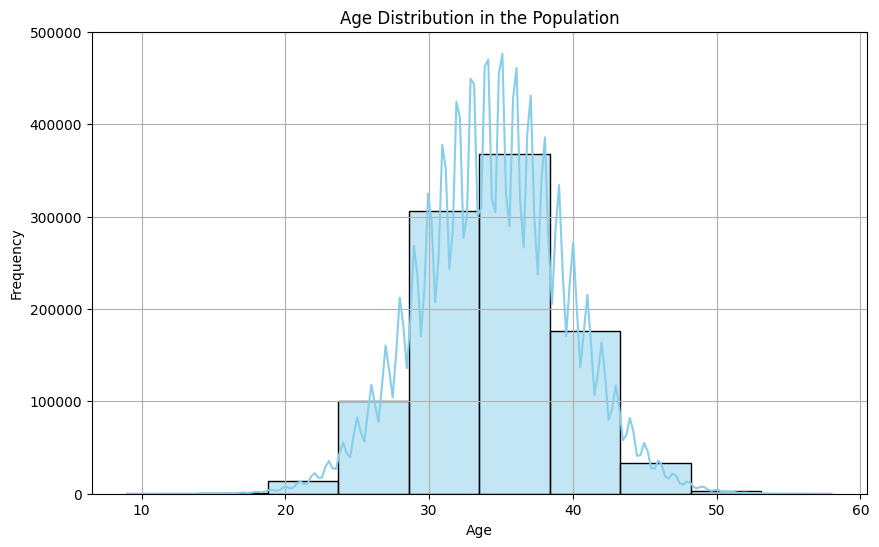

In [7]:
# Visualizando o histogram da variável "Age" (idade)
plt.figure(figsize=(10, 6))
sns.histplot(population['Age'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution in the Population')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

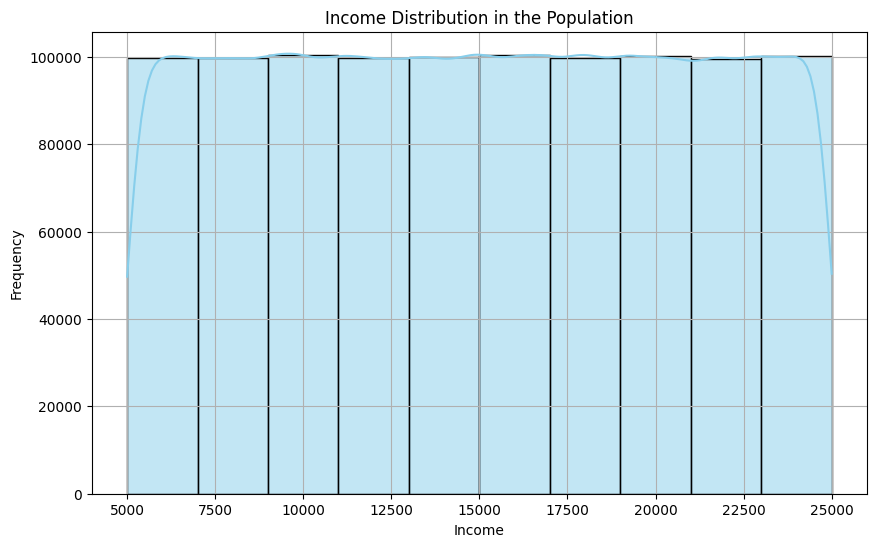

In [8]:
# Visualizando o histogram da variável "Income" (renda)
plt.figure(figsize=(10, 6))
sns.histplot(population['Income'], bins=10, kde=True, color='skyblue')
plt.title('Income Distribution in the Population')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Realizando a análise estatística descritiva**

In [9]:
# Filtrando apenas colunas numéricas
numeric_df = population.select_dtypes(include=[np.number])

# Calculando estatísticas básicas
statistics_summary = numeric_df.describe().T

# Calculando estatísticas adicionais
statistics_summary['median'] = numeric_df.median()
statistics_summary['mode'] = numeric_df.mode().iloc[0]
statistics_summary['range'] = numeric_df.max() - numeric_df.min()
statistics_summary['cv'] = statistics_summary['std'] / statistics_summary['mean']  # Coeficiente de variação
statistics_summary['skewness'] = numeric_df.apply(lambda x: skew(x.dropna()))
statistics_summary['kurtosis'] = numeric_df.apply(lambda x: kurtosis(x.dropna()))
statistics_summary['sem'] = numeric_df.sem()  # Erro padrão da média

# Calculando quartis e intervalo interquartil
quartiles = numeric_df.quantile([0.25, 0.75])
statistics_summary['Q1'] = quartiles.loc[0.25]
statistics_summary['Q3'] = quartiles.loc[0.75]
statistics_summary['IQR'] = statistics_summary['Q3'] - statistics_summary['Q1']

# Visualizando o resumo das estatísticas
statistics_summary = statistics_summary[['count', 'mean', 'std', 'median', 'mode', 'min', 'max', 'range', 'Q1', 'Q3', 'IQR', 'cv', 'skewness', 'kurtosis', 'sem']]

# Formatando todas as colunas para exibir duas casas decimais
statistics_summary = statistics_summary.applymap(lambda x: f"{x:.2f}")

# Exibindo o resumo das estatísticas
statistics_summary

/tmp/ipykernel_29278/2451444431.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  statistics_summary = statistics_summary.applymap(lambda x: f"{x:.2f}")


,count,mean,std,median,mode,min,max,range,Q1,Q3,IQR,cv,skewness,kurtosis,sem
ID,1000000.00,500000.50,288675.28,500000.50,1.00,1.00,1000000.00,999999.00,250000.75,750000.25,499999.50,0.58,0.00,-1.20,288.68
Age,1000000.00,34.51,5.01,35.00,35.00,9.00,58.00,49.00,31.00,38.00,7.00,0.15,-0.00,0.01,0.01
Income,1000000.00,15003.63,5772.26,15007.00,22341.00,5000.00,24999.00,19999.00,10002.00,19996.00,9994.00,0.38,0.00,-1.20,5.77


**Métodos de Amostragem**

Os métodos de amostragem servem para garantir que a amostra represente bem a população que a gente quer estudar. A escolha do método vai depender do tipo da pesquisa, dos recursos que a gente tem e outros fatores importantes.

Existem vários métodos de amostragem, e a escolha certa depende do objetivo do estudo e das características da população. Aqui, vamos usar esses métodos:

*Amostragem aleatória simples*

*Amostragem sistemática*

*Amostragem estratificada*

*Amostragem por conglomerados*

*Amostragem por cotas*

*Amostragem por conveniência*

**Amostragem Aleatória Simples**

A amostragem aleatória simples é um dos métodos mais básicos e usados em estatística. A ideia é escolher uma amostra da população totalmente ao acaso, sem dividir ou separar grupos. Todo mundo na população tem a mesma chance de ser escolhido para a amostra. Esse método é popular porque é fácil de fazer e garante uma estimativa sem viés das características da população.

In [10]:
# Amostragem Aleatória Simples
def amostragem_aleatoria_simples(population, n):
    
    return population.sample(n)

# Exemplo de uso da amostragem aleatória simples para selecionar 10 indivíduos
# Aqui 'populacao' é o DataFrame que contém os dados da população
amostra_aleatoria = amostragem_aleatoria_simples(population, 1000)
print("Amostragem Aleatória Simples:")
print(amostra_aleatoria)

Amostragem Aleatória Simples:
            ID  Age  Gender  Income
932925  932926   25    Male   19694
925085  925086   35    Male    8068
846878  846879   40  Female   13612
341595  341596   36  Female   14867
131754  131755   37  Female   13710
...        ...  ...     ...     ...
250546  250547   32    Male    7724
608293  608294   32  Female    6853
268143  268144   28    Male   20900
332068  332069   40    Male   12724
208552  208553   32  Female    9881

[1000 rows x 4 columns]


**Verificando os parâmetros estatísticos descritivos:**

In [11]:
population.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1000000.0,500000.500000,288675.278932,1.0,250000.75,500000.5,750000.25,1000000.0
Age,1000000.0,34.507381,5.009172,9.0,31.00,35.0,38.00,58.0
Income,1000000.0,15003.634109,5772.256505,5000.0,10002.00,15007.0,19996.00,24999.0


In [12]:
amostra_aleatoria.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1000.0,520660.491,290579.510930,978.0,263030.25,526010.0,777939.75,998874.0
Age,1000.0,34.327,5.079751,18.0,31.00,34.0,38.00,52.0
Income,1000.0,14937.792,5803.932108,5003.0,9688.75,15049.5,19968.00,24976.0


**Visualizando os histogramas juntos**

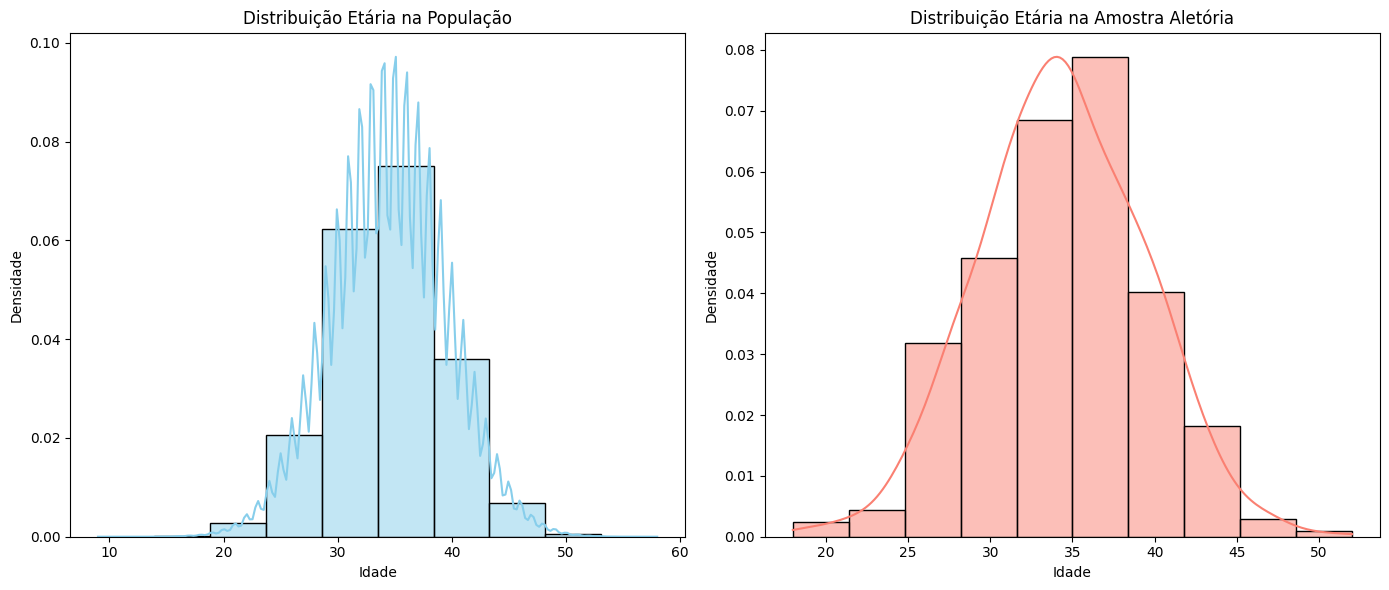

In [13]:
# Supondo que 'population' e 'systematic_sample' sejam seus DataFrames
# e as colunas 'Age' estejam definidas

# Configurações para o tamanho da figura
plt.figure(figsize=(14, 6))

# Plotando o histograma com curva de densidade para a coluna 'Age' do DataFrame 'population'
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, 1ª posição
sns.histplot(population['Age'], bins=10, kde=True, color='skyblue', edgecolor='black', stat='density')
plt.title('Distribuição Etária na População')
plt.xlabel('Idade')
plt.ylabel('Densidade')

# Plotando o histograma com curva de densidade para a coluna 'Age' do DataFrame 'systematic_sample'
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, 2ª posição
sns.histplot(amostra_aleatoria['Age'], bins=10, kde=True, color='salmon', edgecolor='black', stat='density')
plt.title('Distribuição Etária na Amostra Aletória')
plt.xlabel('Idade')
plt.ylabel('Densidade')

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Exibindo os gráficos
plt.show()

**Amostragem Estratificada**

Esse método divide a população em grupos homogêneos chamados “estratos” e depois escolhe uma amostra aleatória de cada grupo. A ideia é garantir que a amostra represente bem a diversidade da população quando ela tem diferenças importantes em alguma característica.

Primeiro, a gente separa a população em grupos com base numa característica que interessa. Por exemplo, se o estudo é sobre renda, dá pra dividir em estratos de renda baixa, média e alta. Depois, escolhemos aleatoriamente pessoas de cada estrato, pra garantir que cada grupo esteja bem representado na amostra final.

A amostragem estratificada é útil quando a população tem muita variação nas características que a gente quer analisar. Ela ajuda a reduzir o erro e deixar as estimativas mais precisas do que a amostragem aleatória simples, especialmente quando os grupos são parecidos dentro deles, mas diferentes entre si.

Um exemplo: se quisermos estudar a satisfação no trabalho numa empresa, podemos dividir os funcionários em estratos pelo nível de senioridade (novos contratados, veteranos, gerentes) e escolher aleatoriamente pessoas de cada grupo pra formar a amostra.

No nosso exemplo iremos utilizar a idade como elemento para identificar os estratos.

In [14]:
# Amostragem estratificada pela indade
def stratified_sampling(population, n, stratification):
 
    sample = pd.DataFrame()   # DataFrame vazio para armazenar a amostra

    # Itera sobre cada estrato definido na estratificação
    for value, proportion in stratification.items():
        stratum = population[population['Age'] == value]  # Filtra a população pelo estrato atual

        # Verifica se o estrato contém indivíduos
        if stratum.empty:
            print(f"There are no individuals in the population with age {value}.")
            print("Please modify the population or change the age.")
            return sample

        # Verifica se há indivíduos suficientes para a amostra no estrato atual
        if len(stratum) < int(n * proportion):
            print(f"There are not enough individuals in the population with age {value}.")
            return sample
        else:
            # Seleciona uma amostra aleatória do estrato atual
            stratum_sample = stratum.sample(int(n * proportion))
            sample = pd.concat([sample, stratum_sample])  # Concatena a amostra do estrato com a amostra geral

    return sample

# Exemplo de uso da amostragem estratificada por idade para selecionar 10 indivíduos
age_stratification = {20: 0.2, 25: 0.3, 30: 0.2, 35: 0.1, 40: 0.2}  # Proporções para cada estrato de idade
stratified_age_sample = stratified_sampling(population, 100, age_stratification)

print("\nAmostragem Estratificada por Idade:")
print(stratified_age_sample)


Amostragem Estratificada por Idade:
            ID  Age  Gender  Income
405824  405825   20    Male    7135
679791  679792   20  Female    8685
112503  112504   20    Male   12207
947309  947310   20  Female    5481
392874  392875   20    Male   17814
...        ...  ...     ...     ...
6248      6249   40    Male    8778
455787  455788   40  Female   24347
184218  184219   40  Female   15210
615423  615424   40    Male   13966
713534  713535   40    Male   22999

[100 rows x 4 columns]


**Verificando os parâmetros estatísticos descritivos da amostra:**

In [15]:
population.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1000000.0,500000.500000,288675.278932,1.0,250000.75,500000.5,750000.25,1000000.0
Age,1000000.0,34.507381,5.009172,9.0,31.00,35.0,38.00,58.0
Income,1000000.0,15003.634109,5772.256505,5000.0,10002.00,15007.0,19996.00,24999.0


In [16]:
stratified_age_sample.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,100.0,474144.82,275906.128152,6249.0,242563.25,481875.0,684845.0,967633.0
Age,100.0,29.00,7.035265,20.0,25.00,27.5,35.0,40.0
Income,100.0,14812.90,5557.884834,5481.0,9479.75,14791.0,19602.0,24736.0


**Visualizando os histogramas juntos:**

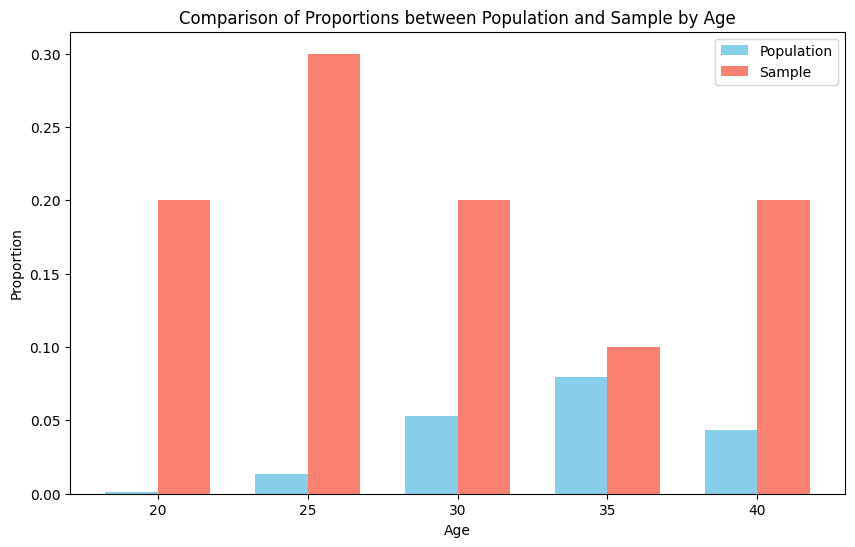

In [17]:
# Calculate proportions in the population
population_proportions = {age: len(population[population['Age'] == age]) / len(population) for age in age_stratification.keys()}

# Calculate proportions in the sample
sample_proportions = {age: len(stratified_age_sample[stratified_age_sample['Age'] == age]) / len(stratified_age_sample) for age in age_stratification.keys()}

# Ages and proportion values
ages = list(age_stratification.keys())
population_props = list(population_proportions.values())
sample_props = list(sample_proportions.values())

# Bar width
bar_width = 0.35

# Bar positions on the plot
positions = range(len(ages))

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(positions, population_props, bar_width, label='Population', color='skyblue')
plt.bar([p + bar_width for p in positions], sample_props, bar_width, label='Sample', color='salmon')

# Labels and title
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.title('Comparison of Proportions between Population and Sample by Age')
plt.xticks([p + bar_width / 2 for p in positions], ages)
plt.legend()

plt.show()

**Amostragem Sistemática**

A amostragem sistemática é um método onde a gente escolhe os indivíduos em intervalos regulares, seguindo um processo organizado. Basicamente, a população é colocada numa lista ordenada, e a gente seleciona cada k-ésimo elemento dessa lista — esse k é o chamado “intervalo de amostragem”.

Por exemplo, se a população tem 1000 pessoas e o intervalo é 10, vamos pegar o 1º, o 11º, o 21º, e assim por diante, até completar a amostra. A lista pode ser ordenada por qualquer coisa, como um ID ou outra característica numérica.

Esse método é usado quando a população já está organizada ou quando é difícil tirar uma amostra totalmente aleatória. É simples de aplicar e funciona bem quando a população é grande e bem distribuída. Mas tem que tomar cuidado porque, se a ordem da população seguir algum padrão estranho, pode acabar gerando viés na amostra. Por isso, sempre é bom analisar bem os resultados depois.

In [18]:
# Amostragem Sistemática
def systematic_sampling(population, n):
    k = len(population) // n  # Número de indivíduos em cada intervalo
    start = np.random.randint(0, k)  # Ponto de partida aleatório
    sampled_indices = np.arange(start, len(population), step=k)
    return population.iloc[sampled_indices]

# Exemplo de uso da amostragem sistemática para selecionar 100 indivíduos
systematic_sample = systematic_sampling(population, 100)
print("\nAmostragem Sistemática:")
print(systematic_sample)


Amostragem Sistemática:
            ID  Age  Gender  Income
6722      6723   40  Female    5715
16722    16723   32  Female    9975
26722    26723   22    Male    5660
36722    36723   32  Female   20273
46722    46723   32  Female   21502
...        ...  ...     ...     ...
956722  956723   28  Female   23169
966722  966723   38  Female    5338
976722  976723   37    Male    8769
986722  986723   34    Male    6651
996722  996723   33    Male   12701

[100 rows x 4 columns]


**Observação:**

O valor de 𝑘 é calculado dividindo o total de indivíduos da população pelo número de amostras que a gente quer, 𝑛. No código, isso é feito assim:

k = len(population) // n


Aqui, len(population) é o número total de indivíduos, e n é quantos queremos na amostra.

O // faz uma divisão inteira, ou seja, divide e arredonda pra baixo, pra pegar o intervalo certinho.

Por exemplo, se a população tem 1000 pessoas e queremos 15 amostras, o cálculo é:

𝑘 = 1000 / 15 ≈ 66

Ou seja, vamos selecionar cada 66º indivíduo, começando de um ponto aleatório.

**Verificando os parâmetros estatísticos descritivos da amostra:**

In [19]:
population.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1000000.0,500000.500000,288675.278932,1.0,250000.75,500000.5,750000.25,1000000.0
Age,1000000.0,34.507381,5.009172,9.0,31.00,35.0,38.00,58.0
Income,1000000.0,15003.634109,5772.256505,5000.0,10002.00,15007.0,19996.00,24999.0


In [20]:
systematic_sample.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,100.0,501723.00,290114.919759,6723.0,254223.00,501723.0,749223.0,996723.0
Age,100.0,33.80,4.978743,22.0,32.00,34.0,37.0,52.0
Income,100.0,15180.21,5950.748148,5234.0,9808.25,15395.0,20301.5,24910.0


**Visualizando os histogramas juntos:**

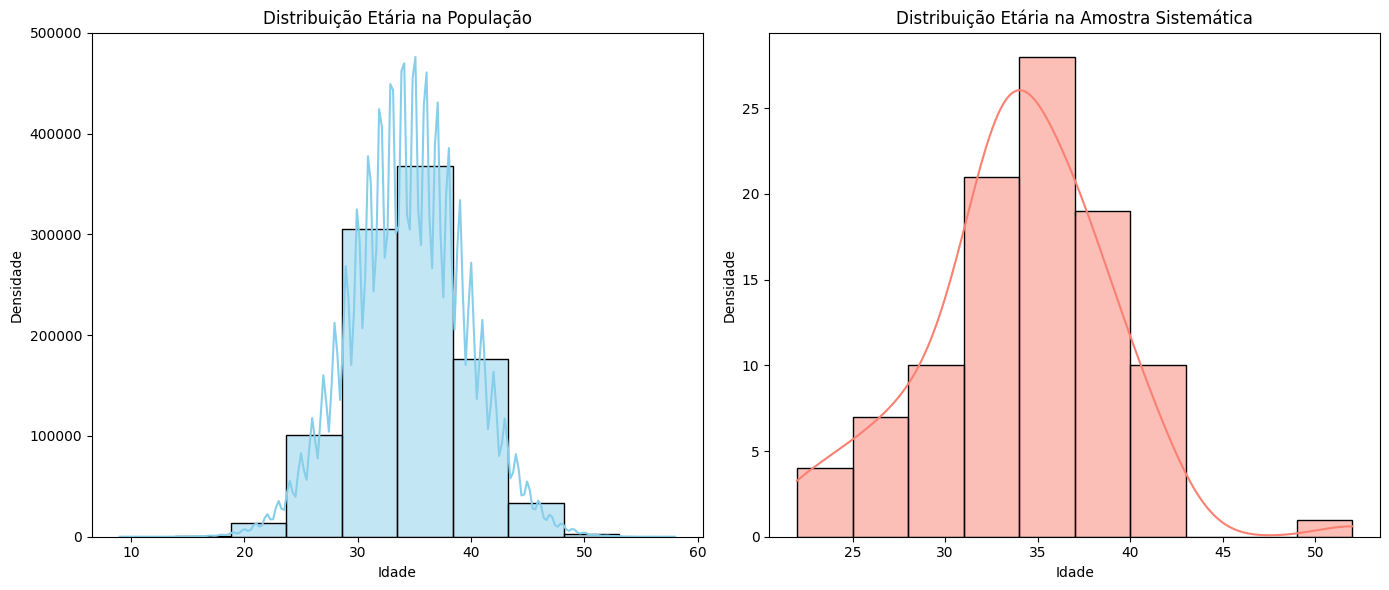

In [21]:
# Criar uma figura com dois subgráficos
plt.figure(figsize=(14, 6))

# Primeiro gráfico: Distribuição etária na população
plt.subplot(1, 2, 1)  # (linhas, colunas, índice do gráfico)
sns.histplot(population['Age'], bins=10, kde=True, color='skyblue')
plt.title('Distribuição Etária na População')
plt.xlabel('Idade')
plt.ylabel('Densidade')

# Segundo gráfico: Distribuição etária na amostra
plt.subplot(1, 2, 2)  # (linhas, colunas, índice do gráfico)
sns.histplot(systematic_sample['Age'], bins=10, kde=True, color='salmon')
plt.title('Distribuição Etária na Amostra Sistemática')
plt.xlabel('Idade')
plt.ylabel('Densidade')

plt.tight_layout()
plt.show()

**Amostragem por Conglomerados**

Na amostragem por conglomerados, a gente divide a população em grupos chamados “conglomerados” e escolhe aleatoriamente alguns desses grupos para formar a amostra. Esse método é útil quando a população já está organizada naturalmente em grupos e não dá pra escolher cada indivíduo separadamente.

Os conglomerados são grupos homogêneos dentro da população, que podem ser baseados em localização, características sociais, ou outras coisas que definem a estrutura da população. Por exemplo, se a gente quer estudar a educação primária numa região, os conglomerados podem ser as escolas daquela área. Depois de escolher os conglomerados aleatoriamente (usando amostragem aleatória simples ou sistemática), a gente pode selecionar indivíduos dentro desses grupos usando outras técnicas, como amostragem aleatória simples ou estratificada.

Esse método é bom quando a população é grande e espalhada, ou quando selecionar indivíduos diretamente é difícil. Ele simplifica o processo, focando em escolher grupos representativos ao invés de pessoas soltas. Porém, a precisão pode ser menor, porque os indivíduos dentro do mesmo conglomerado podem ser parecidos demais e não representar toda a população direito. Por isso, é importante pensar bem nos prós e contras entre eficiência e precisão antes de usar essa técnica.

In [22]:
# Função para realizar a amostragem por conglomerados
def cluster_sampling(population, n, num_clusters):
    
    # Dividir a população em 'num_clusters' conglomerados
    clusters = np.array_split(population, num_clusters)

    # Selecionar aleatoriamente um indivíduo de cada conglomerado
    sampled_clusters = [cluster.sample(1) for cluster in clusters]

    # Concatenar os indivíduos selecionados de todos os conglomerados
    sample = pd.concat(sampled_clusters, axis=0)

    # Retornar os primeiros 'n' indivíduos da amostra
    return sample.head(n)

# Exemplo de uso da amostragem por conglomerados para selecionar 100 indivíduos
cluster_sample = cluster_sampling(population, 100, 5)

print("\nAmostragem por Conglomerados:")
print(cluster_sample)


Amostragem por Conglomerados:
            ID  Age  Gender  Income
75348    75349   32  Female   12500
354840  354841   35    Male   14555
574301  574302   32  Female   18322
789528  789529   41    Male   16795
825704  825705   35  Female   17575


/home/codespace/.local/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


**Explicação Detalhada**

**Importação das Bibliotecas:**

Importamos numpy e pandas para trabalhar com os dados.

Função cluster_sampling:

**Parâmetros:**

population: O DataFrame com toda a população.

n: Quantidade de indivíduos que queremos na amostra final.

num_clusters: Quantos conglomerados vamos dividir a população.

**Como funciona:**

Usamos np.array_split(population, num_clusters) para dividir a população em num_clusters grupos.

Depois, selecionamos aleatoriamente uma pessoa de cada grupo com [cluster.sample(1) for cluster in clusters].

Juntamos essas pessoas numa só tabela com pd.concat(sampled_clusters, axis=0).

Por fim, pegamos os primeiros n indivíduos dessa amostra com sample.head(n).

**Exemplo de uso:**

cluster_sample = cluster_sampling(population, 100, 5)
print("\nAmostragem por Conglomerados:")
print(cluster_sample)


Isso vai pegar 100 indivíduos de 5 conglomerados e mostrar o resultado.

**Verificando os parâmetros estatísticos descritivos da amostra**

In [23]:
population.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1000000.0,500000.500000,288675.278932,1.0,250000.75,500000.5,750000.25,1000000.0
Age,1000000.0,34.507381,5.009172,9.0,31.00,35.0,38.00,58.0
Income,1000000.0,15003.634109,5772.256505,5000.0,10002.00,15007.0,19996.00,24999.0


In [24]:
cluster_sample.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5.0,523945.2,313832.885521,75349.0,354841.0,574302.0,789529.0,825705.0
Age,5.0,35.0,3.674235,32.0,32.0,35.0,35.0,41.0
Income,5.0,15949.4,2389.014295,12500.0,14555.0,16795.0,17575.0,18322.0


**Visualizando os histogramas juntos:**

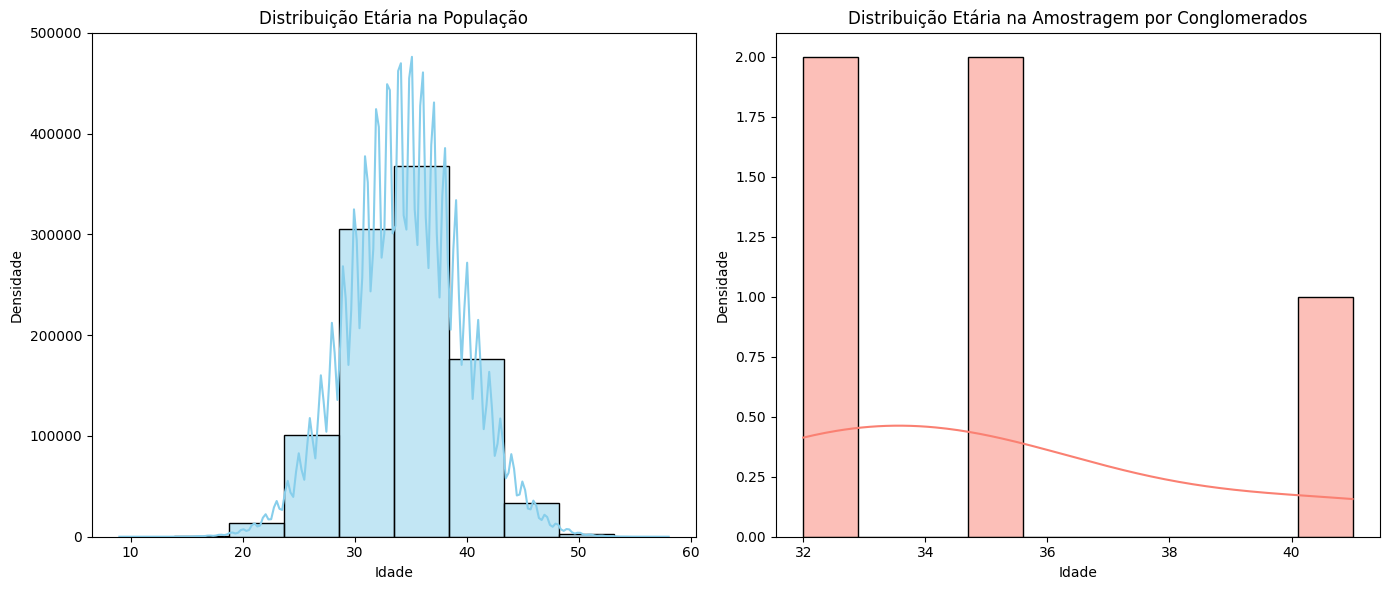

In [25]:
# Criar uma figura com dois subgráficos
plt.figure(figsize=(14, 6))

# Primeiro gráfico: Distribuição etária na população
plt.subplot(1, 2, 1)  # (linhas, colunas, índice do gráfico)
sns.histplot(population['Age'], bins=10, kde=True, color='skyblue')
plt.title('Distribuição Etária na População')
plt.xlabel('Idade')
plt.ylabel('Densidade')

# Segundo gráfico: Distribuição etária na amostra
plt.subplot(1, 2, 2)  # (linhas, colunas, índice do gráfico)
sns.histplot(cluster_sample['Age'], bins=10, kde=True, color='salmon')
plt.title('Distribuição Etária na Amostragem por Conglomerados')
plt.xlabel('Idade')
plt.ylabel('Densidade')

plt.tight_layout()
plt.show()

**Amostragem por Cotas**

A amostragem por cotas é um método não probabilístico onde a população é dividida em grupos chamados “cotas”, baseados em características importantes, como idade, gênero, escolaridade, renda, etc. Depois, a gente seleciona pessoas de cada cota até alcançar um número definido para cada grupo.

Esse método ajuda a garantir que a amostra tenha as proporções certas dessas características na população, mas a escolha dos indivíduos dentro das cotas não é aleatória.

As cotas são feitas para refletir as proporções desejadas da população. A seleção pode ser feita de várias formas, como listas de contato, entrevistas na rua ou ligações telefônicas. Depois que as pessoas são escolhidas em cada cota, juntamos tudo pra formar a amostra final.

Esse tipo de amostragem é útil quando não dá pra usar amostragem aleatória e a gente precisa garantir que a amostra represente certas características da população. Mas tem que tomar cuidado, porque pode rolar viés se as cotas não forem bem definidas ou se a seleção dentro delas não for aleatória. Por isso, é importante planejar e executar bem esse método pra garantir uma amostra confiável e representativa.

In [26]:
# Amostragem por Cotas
def quota_sampling(population, quotas):
    """
    Realiza a amostragem por cotas da população.

    Parâmetros:
    population (DataFrame): O DataFrame que contém todos os indivíduos da população.
    quotas (dict): Um dicionário onde as chaves são atributos (colunas) e os valores são os critérios para as cotas.

    Exemplo de dicionário de cotas:
    {'Gender': 'Male', 'Age': 30}

    Retorna:
    DataFrame: Uma amostra contendo indivíduos que atendem às cotas especificadas.
    """
    # Cria um DataFrame vazio para armazenar a amostra
    sample = pd.DataFrame()

    # Itera sobre cada atributo e valor especificado nas cotas
    for attribute, value in quotas.items():
        # Filtra a população para obter o subconjunto que atende à cota atual
        subset = population[population[attribute] == value]

        # Seleciona aleatoriamente 50% dos casos do subconjunto para a amostra de maneira a atender o critério estabelecido
        # Note que `frac=0.5` indica a seleção de 50% dos casos
        sample = pd.concat([sample, subset.sample(frac=0.5)])

    return sample

# Exemplo de uso da amostragem por cotas para selecionar indivíduos
selected_quotas = {'Gender': 'Male', 'Age': 30}  # Exemplo de cotas selecionadas (critério)
quota_sample = quota_sampling(population, selected_quotas)

print("\nAmostragem por Cotas:")
print(quota_sample)


Amostragem por Cotas:
            ID  Age  Gender  Income
382465  382466   35    Male   19884
136738  136739   33    Male   21794
267030  267031   39    Male    9544
193372  193373   36    Male   22403
118308  118309   23    Male   18476
...        ...  ...     ...     ...
597106  597107   30  Female   12461
486385  486386   30  Female   10356
34633    34634   30    Male   19607
623422  623423   30  Female   12132
674102  674103   30  Female   24196

[276555 rows x 4 columns]


**Explicação Detalhada**

**Função quota_sampling:**

**Parâmetros:**

population: O DataFrame com toda a população.

quotas: Um dicionário com os atributos (colunas) e os valores que definem as cotas.

**Exemplo de dicionário de cotas:**

{'Gender': 'Male', 'Age': 30}


**Como funciona:**

Criamos um DataFrame vazio chamado sample pra guardar a amostra final.

Para cada atributo e valor nas cotas, filtramos a população pra pegar só quem atende ao critério.

Selecionamos aleatoriamente 50% desse grupo e adicionamos na amostra.

**Retorno:**

O DataFrame sample com os indivíduos que seguem as cotas.

**Exemplo de uso:**

selected_quotas = {'Gender': 'Male', 'Age': 30}
quota_sample = quota_sampling(population, selected_quotas)
print("\nAmostragem por Cotas:")
print(quota_sample)


Esse exemplo seleciona homens de 30 anos da população, pegando uma amostra aleatória dentro dessa cota.








**Verificando os parâmetros estatísticos descritivos da amostra**

In [27]:
population.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1000000.0,500000.500000,288675.278932,1.0,250000.75,500000.5,750000.25,1000000.0
Age,1000000.0,34.507381,5.009172,9.0,31.00,35.0,38.00,58.0
Income,1000000.0,15003.634109,5772.256505,5000.0,10002.00,15007.0,19996.00,24999.0


In [28]:
quota_sample.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,276555.0,500319.421591,288495.585735,7.0,251454.0,500320.0,750122.5,999999.0
Age,276555.0,34.082515,4.945932,12.0,30.0,34.0,37.0,58.0
Income,276555.0,15006.986784,5769.766316,5000.0,10013.0,15002.0,19992.0,24999.0


**Visualizando os histogramas juntos**

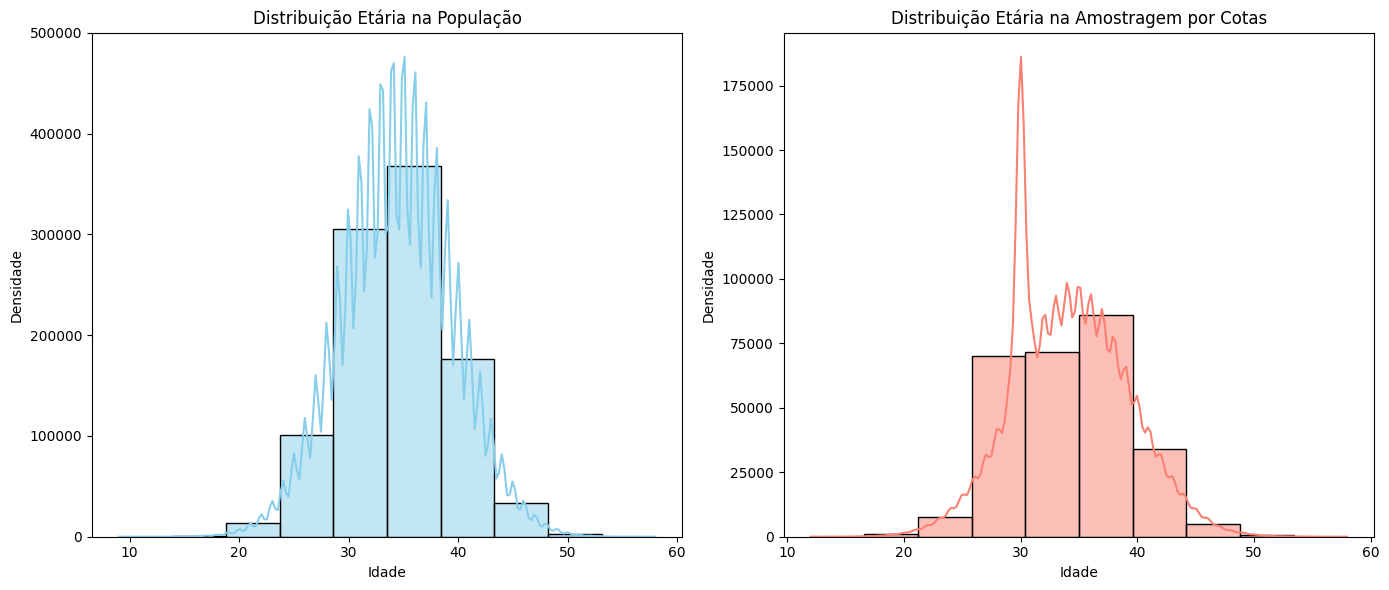

In [29]:
# Criar uma figura com dois subgráficos
plt.figure(figsize=(14, 6))

# Primeiro gráfico: Distribuição etária na população
plt.subplot(1, 2, 1)  # (linhas, colunas, índice do gráfico)
sns.histplot(population['Age'], bins=10, kde=True, color='skyblue')
plt.title('Distribuição Etária na População')
plt.xlabel('Idade')
plt.ylabel('Densidade')

# Segundo gráfico: Distribuição etária na amostra
plt.subplot(1, 2, 2)  # (linhas, colunas, índice do gráfico)
sns.histplot(quota_sample['Age'], bins=10, kde=True, color='salmon')
plt.title('Distribuição Etária na Amostragem por Cotas')
plt.xlabel('Idade')
plt.ylabel('Densidade')

plt.tight_layout()
plt.show()

**Limitando a quantidade de amostra**

In [30]:
def quota_sampling(population, quotas, frac=0.5, max_sample_size=100):

    sample = pd.DataFrame()  # Cria um DataFrame vazio para armazenar a amostra

    for attribute, value in quotas.items():
        # Filtra a população para obter o subconjunto que atende à cota atual
        subset = population[population[attribute] == value]

        if not subset.empty:
            # Seleciona uma fração dos casos do subconjunto, respeitando a fração especificada
            sample = pd.concat([sample, subset.sample(frac=frac)])

    # Remove duplicatas para garantir que cada indivíduo apareça apenas uma vez
    sample = sample.drop_duplicates()

    # Limita a amostra ao tamanho máximo especificado
    if len(sample) > max_sample_size:
        sample = sample.sample(n=max_sample_size)

    return sample

# Exemplo de uso da amostragem por cotas para selecionar até 100 indivíduos, com uma fração de 50%
selected_quotas = {'Gender': 'Male', 'Age': 30}  # Exemplo de cotas selecionadas
quota_sample = quota_sampling(population, selected_quotas, frac=0.5, max_sample_size=100)

print("\nAmostragem por Cotas:")
print(quota_sample)


Amostragem por Cotas:
            ID  Age Gender  Income
529985  529986   33   Male   19908
898127  898128   36   Male    7104
53158    53159   35   Male    9488
292154  292155   29   Male    7606
596977  596978   37   Male    9200
...        ...  ...    ...     ...
621473  621474   40   Male   23626
547034  547035   29   Male   16102
454016  454017   35   Male   14163
161220  161221   32   Male    9026
632958  632959   21   Male   24192

[100 rows x 4 columns]


**Verificando os parâmetros estatísticos descritivos da amostra**

In [31]:
population.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1000000.0,500000.500000,288675.278932,1.0,250000.75,500000.5,750000.25,1000000.0
Age,1000000.0,34.507381,5.009172,9.0,31.00,35.0,38.00,58.0
Income,1000000.0,15003.634109,5772.256505,5000.0,10002.00,15007.0,19996.00,24999.0


In [32]:
quota_sample.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,100.0,543625.41,284434.180133,3092.0,296395.25,584190.0,781609.0,994915.0
Age,100.0,33.82,5.023943,21.0,30.00,33.5,37.0,49.0
Income,100.0,14191.86,6019.050350,5015.0,8948.75,13899.5,19249.5,24808.0


**Visualizando os histogramas juntos**

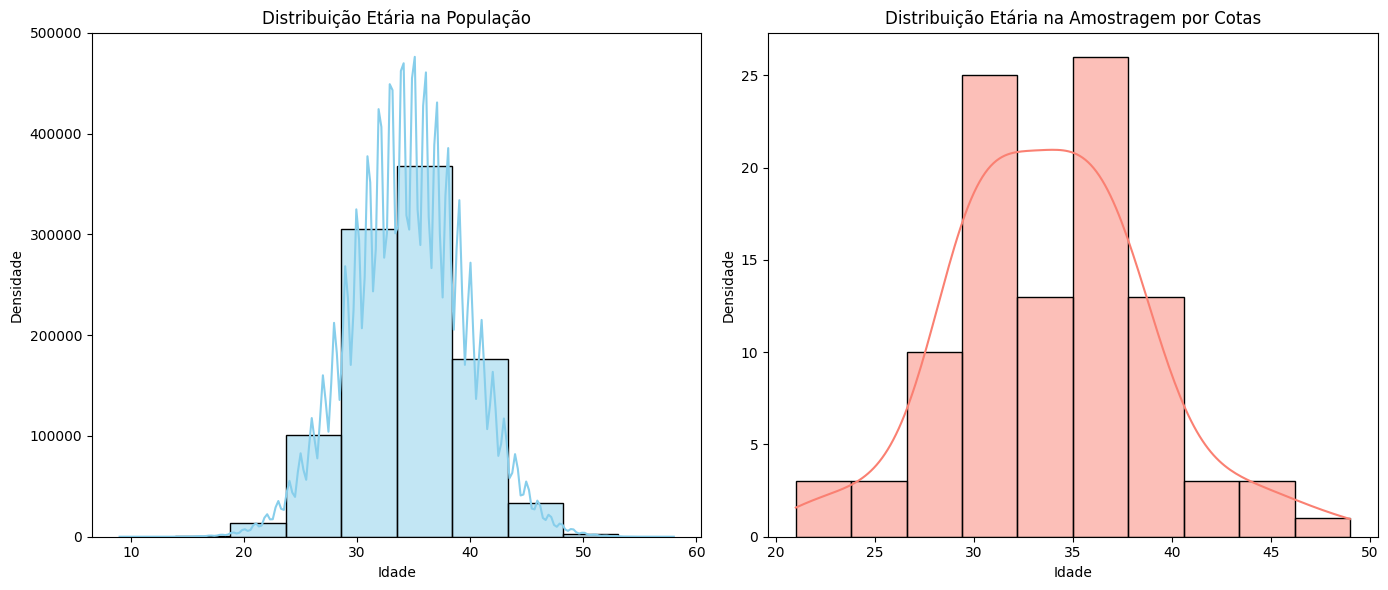

In [33]:
# Criar uma figura com dois subgráficos
plt.figure(figsize=(14, 6))

# Primeiro gráfico: Distribuição etária na população
plt.subplot(1, 2, 1)  # (linhas, colunas, índice do gráfico)
sns.histplot(population['Age'], bins=10, kde=True, color='skyblue')
plt.title('Distribuição Etária na População')
plt.xlabel('Idade')
plt.ylabel('Densidade')

# Segundo gráfico: Distribuição etária na amostra
plt.subplot(1, 2, 2)  # (linhas, colunas, índice do gráfico)
sns.histplot(quota_sample['Age'], bins=10, kde=True, color='salmon')
plt.title('Distribuição Etária na Amostragem por Cotas')
plt.xlabel('Idade')
plt.ylabel('Densidade')

plt.tight_layout()
plt.show()

**Amostragem Oportuna ou por Conveniência**

A amostragem oportuna, ou por conveniência, é um método não probabilístico onde a gente escolhe as pessoas que estão mais fáceis de acessar ou disponíveis no momento. Aqui, não tem preocupação em garantir que a amostra seja aleatória ou representativa da população — o foco é só pegar quem for mais fácil de alcançar.

As pessoas são selecionadas porque estão acessíveis ou disponíveis para o pesquisador. Pode ser quem estiver perto, fácil de contatar ou que aceite participar na hora. Como não é uma seleção aleatória, os resultados podem não representar bem a população geral.

Esse método é usado quando fazer uma amostragem aleatória é muito difícil ou caro, ou quando só dá pra acessar uma parte pequena da população. É comum quando o estudo é exploratório, para obter uma ideia rápida sobre um tema, sem seguir um processo mais rigoroso.

Mas atenção: os resultados podem ser influenciados por fatores que a gente não controla e nem sempre servem pra toda a população. Por isso, é importante interpretar esses dados com cuidado e saber das limitações desse tipo de amostragem.

In [34]:
# Amostragem por Conveniência
def convenience_sampling(population, n):

    # Seleciona aleatoriamente 'n' indivíduos da população
    return population.sample(n)

# Exemplo de uso da amostragem por conveniência para selecionar 100 indivíduos
convenience_sample = convenience_sampling(population, 100)

print("\nAmostragem por Conveniência:")
print(convenience_sample)


Amostragem por Conveniência:
            ID  Age  Gender  Income
163818  163819   26  Female   10874
830132  830133   40  Female    6757
369643  369644   37    Male   22136
235539  235540   41    Male   14355
907481  907482   34    Male   23901
...        ...  ...     ...     ...
684795  684796   35  Female   14628
525024  525025   37    Male    7515
154054  154055   33    Male    5827
624090  624091   36  Female    5218
861137  861138   29  Female    9309

[100 rows x 4 columns]


**Explicação Detalhada**

**Função convenience_sampling:**

**Parâmetros:**

population: O DataFrame com toda a população.

n: Quantidade de indivíduos que queremos na amostra.

**Como funciona:**

Usamos population.sample(n) para pegar n indivíduos da população. Essa seleção é feita de forma conveniente, ou seja, sem garantir aleatoriedade rigorosa ou representatividade estatística.

**Exemplo de uso:**

convenience_sample = convenience_sampling(population, 12)
print("\nAmostragem por Conveniência:")
print(convenience_sample)


Isso seleciona 12 indivíduos da população e mostra o resultado.

**Verificando os parâmetros estatísticos descritivos da amostra**

In [35]:
population.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1000000.0,500000.500000,288675.278932,1.0,250000.75,500000.5,750000.25,1000000.0
Age,1000000.0,34.507381,5.009172,9.0,31.00,35.0,38.00,58.0
Income,1000000.0,15003.634109,5772.256505,5000.0,10002.00,15007.0,19996.00,24999.0


In [36]:
convenience_sample.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,100.0,516760.98,277672.765211,7989.0,289814.75,543184.5,768574.5,976884.0
Age,100.0,34.34,4.110150,24.0,31.00,34.0,37.0,44.0
Income,100.0,14039.01,5884.699399,5023.0,9292.50,13143.0,19315.5,24671.0


**Visualizando os histogramas juntos:**

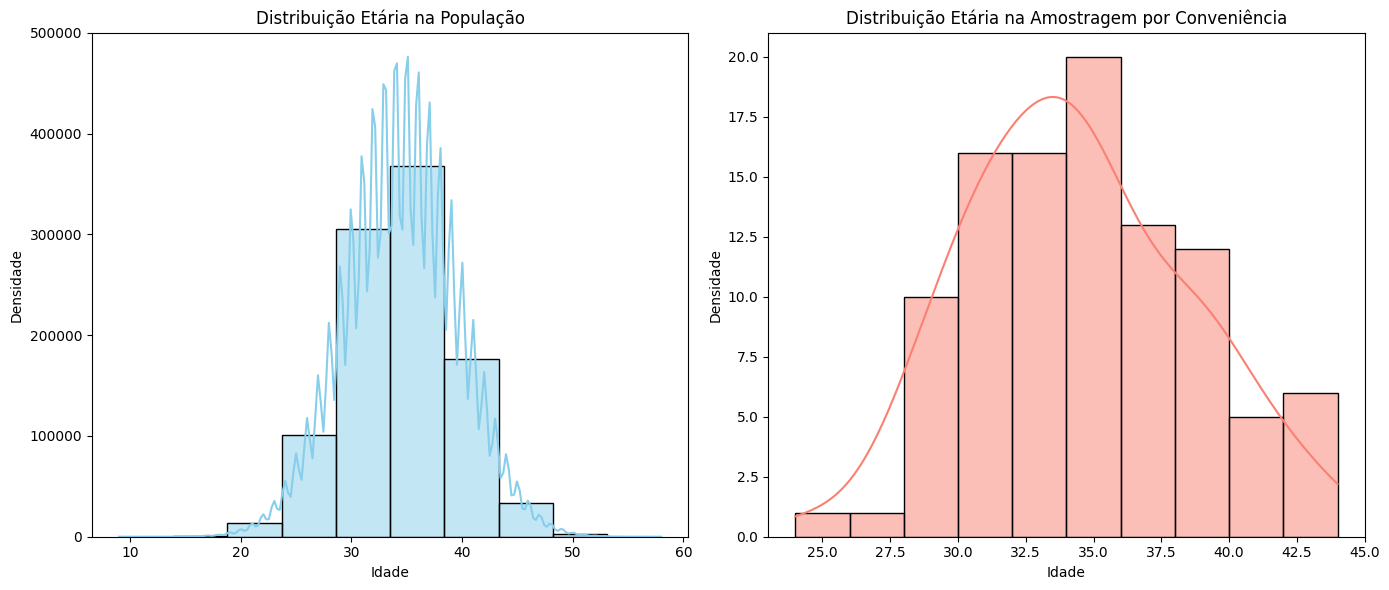

In [37]:
# Criar uma figura com dois subgráficos
plt.figure(figsize=(14, 6))

# Primeiro gráfico: Distribuição etária na população
plt.subplot(1, 2, 1)  # (linhas, colunas, índice do gráfico)
sns.histplot(population['Age'], bins=10, kde=True, color='skyblue')
plt.title('Distribuição Etária na População')
plt.xlabel('Idade')
plt.ylabel('Densidade')

# Segundo gráfico: Distribuição etária na amostra sistemática
plt.subplot(1, 2, 2)  # (linhas, colunas, índice do gráfico)
sns.histplot(convenience_sample['Age'], bins=10, kde=True, color='salmon')
plt.title('Distribuição Etária na Amostragem por Conveniência')
plt.xlabel('Idade')
plt.ylabel('Densidade')

plt.tight_layout()
plt.show()

In [38]:
# Dataset, coluna 'Gender' com os valores 'Male' para homens e 'Female' para mulheres


# Contagem de homens e mulheres no dataset original
total_male = len(population[population['Gender'] == 'Male'])
total_female = len(population[population['Gender'] == 'Female'])

# Definindo o tamanho da amostra
sample_size = 100

# Calculando a proporção de homens e mulheres na amostra
male_sample_size = int((total_male / len(population)) * sample_size)
female_sample_size = sample_size - male_sample_size

# Realizando a amostragem aleatória mantendo a proporção
male_sample = population[population['Gender'] == 'Male'].sample(n=male_sample_size, random_state=42)
female_sample = population[population['Gender'] == 'Female'].sample(n=female_sample_size, random_state=42)

# Concatenando as amostras
final_sample = pd.concat([male_sample, female_sample])

# Embaralhando os dados para misturar homens e mulheres
final_sample = final_sample.sample(frac=1, random_state=42).reset_index(drop=True)

print(final_sample)

        ID  Age  Gender  Income
0   591601   37  Female   11968
1   462490   34  Female    7556
2   734412   32  Female   20110
3     2964   27    Male    8909
4    15917   33    Male    7426
..     ...  ...     ...     ...
95  965419   31  Female   10902
96  183499   24  Female   19963
97   28503   31    Male   12805
98  886346   36  Female   19923
99  711685   42  Female    8333

[100 rows x 4 columns]


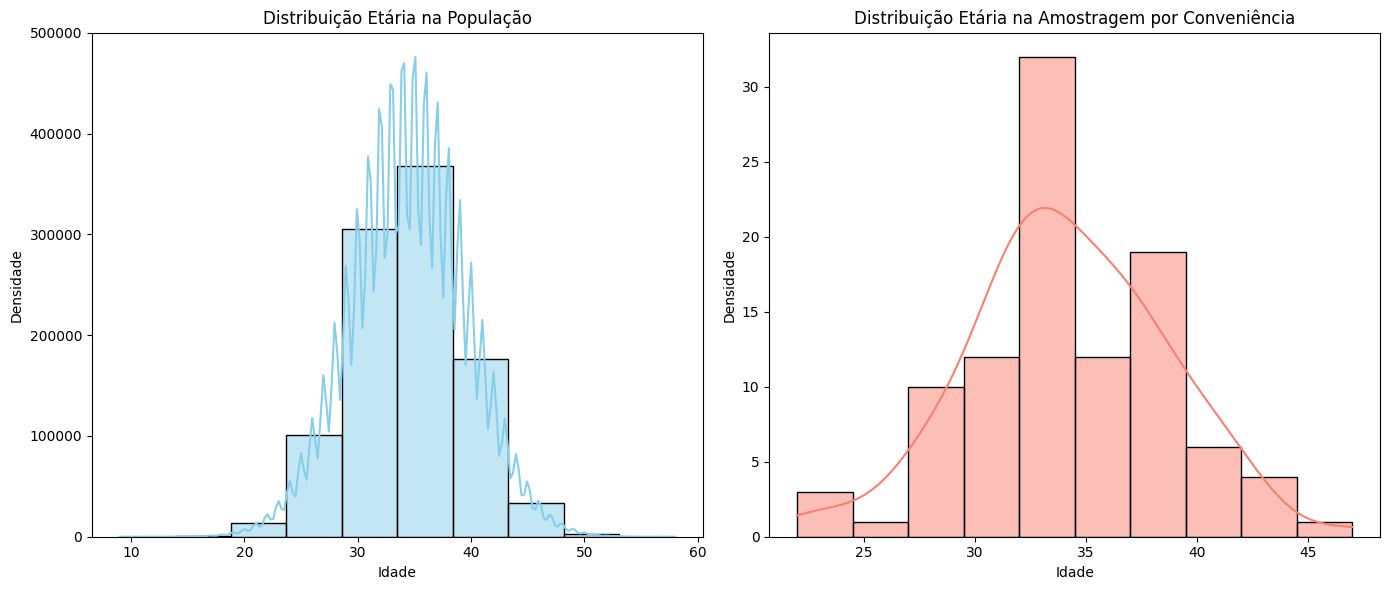

In [39]:
# Criar uma figura com dois subgráficos
plt.figure(figsize=(14, 6))

# Primeiro gráfico: Distribuição etária na população
plt.subplot(1, 2, 1)  # (linhas, colunas, índice do gráfico)
sns.histplot(population['Age'], bins=10, kde=True, color='skyblue')
plt.title('Distribuição Etária na População')
plt.xlabel('Idade')
plt.ylabel('Densidade')

# Segundo gráfico: Distribuição etária na amostra sistemática
plt.subplot(1, 2, 2)  # (linhas, colunas, índice do gráfico)
sns.histplot(final_sample['Age'], bins=10, kde=True, color='salmon')
plt.title('Distribuição Etária na Amostragem por Conveniência')
plt.xlabel('Idade')
plt.ylabel('Densidade')

plt.tight_layout()
plt.show()